# Parsing Celeb A Dataset and Attributes

In [5]:
import scipy.io as sio
import sys
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline


# Parses from a file that gives mapping from file names to labels
def parse_celeba_labels(path):
	f = open(path, 'r')
	count = 0
	file_to_label = {}
	for line in f:
		arr = line.split(" ")
		if len(arr) == 2:
			file_to_label[arr[0]] = int(arr[1].split("\n")[0])
	return file_to_label

# Returns data and corresponding labels
def get_celeb_a_dataset(path_data, path_labels):
	# Dictionary mapping file names to labels
	file_to_label = parse_celeba_labels(path_labels)
	f = open(path_data, 'r')

	# Skip first two lines of the file
	f.readline()
	f.readline()

	count = 0
	labels = []
	data = []
	for line in f:
		temp = []
		arr = line.split()
		for elem in arr[1:]:
			if int(elem) < 0:
				temp.append(0)
			else:
				temp.append(1)
		data.append(temp)
		labels.append(file_to_label[arr[0]])
	return data, labels


# Testing
data, labels = get_celeb_a_dataset("celeb_a_data.txt", "celeb_a_labels.txt")

# For images of the same people, what attribtues stay the same

In [4]:
dic = {}
count = 0
for elem in labels:
    if elem in dic:
        dic[elem].append(count)
    else:
        dic[elem] = [count]
    count += 1



def calculate_distance(i,j):
    return distance.hamming(data[i], data[j])

same_distance = []
for same in dic:
    i = 0
    while i < len(dic[same]):
        j = i + 1
        while j < len(dic[same]):
            same_distance.append(calculate_distance(dic[same][i], dic[same][j]))
            j += 1
        i += 1


hi


In [10]:
print same

10177


## Figuring which attribtues are represented in the Celeb A dataset the best

In [74]:
count = 0
total_dic = {}

counter = 1
while counter <= len(dic.keys()):
    count_dic = {}
    for features in dic[counter]:
        count = 0
        for elem in data[features]:
            if count not in count_dic:
                count_dic[count] = 0
            if elem == 1:
                count_dic[count] += 1
            count += 1
    for elem in count_dic:
        x = count_dic[elem] / float(len(dic[counter]))
        if x < 0.5:
            x = 1 - x
        count_dic[elem] = x

    count = 0
    while count < 40:
        if count not in total_dic:
            total_dic[count] = 0
        total_dic[count] += count_dic[count]
        count += 1
    counter += 1

for elem in total_dic:
    total_dic[elem] = total_dic[elem] / len(dic.keys())    

In [75]:
print total_dic

{0: 0.9348347587950239, 1: 0.869007869765759, 2: 0.8354652834868082, 3: 0.8581950538756407, 4: 0.986059076456728, 5: 0.9045422890897654, 6: 0.9336896105649122, 7: 0.8959093934647407, 8: 0.8700929867114432, 9: 0.9287426721064912, 10: 0.9433563677568222, 11: 0.8611586391781292, 12: 0.9186714834253175, 13: 0.9582329185596218, 14: 0.9599520846404572, 15: 0.9573592857350347, 16: 0.9610556333857341, 17: 0.9709759598476041, 18: 0.8801785695483884, 19: 0.7665188507001536, 20: 0.9944689958413266, 21: 0.7220066687987243, 22: 0.9741617759525206, 23: 0.9022737690937059, 24: 0.9347183646032767, 25: 0.8322913926041953, 26: 0.9605982998073318, 27: 0.8506253338830352, 28: 0.9390041555186837, 29: 0.9480387745715092, 30: 0.9628042405511139, 31: 0.739242954607835, 32: 0.8558985017389639, 33: 0.826205214392711, 34: 0.8705936366456539, 35: 0.9587225474676413, 36: 0.9146483840447373, 37: 0.9029961094789486, 38: 0.9368350646076894, 39: 0.9621532044859762}


In [76]:
total_arr = []
count = 0
while count <= 39:
    total_arr.append(total_dic[count])
    count += 1

In [77]:
N = 40


In [78]:
import numpy as np
ind = np.arange(N)  # the x locations for the groups
width = 1       # the width of the bars



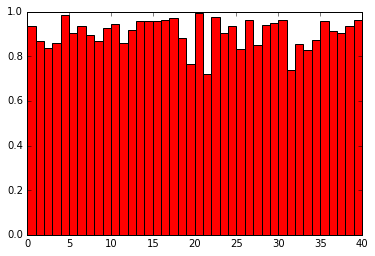

In [79]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, total_arr, width, color='r')

In [82]:
x = sorted(total_dic, key=total_dic.get, reverse=True)
for elem in x:
    print str(elem) + '  ' + str(total_dic[elem]) + '   ' + str(hi[elem])

20  0.994468995841   Male
4  0.986059076457   Bald
22  0.974161775953   Mustache
17  0.970975959848   Gray_Hair
30  0.962804240551   Sideburns
39  0.962153204486   Young
16  0.961055633386   Goatee
26  0.960598299807   Pale_Skin
14  0.95995208464   Double_Chin
35  0.958722547468   Wearing_Hat
13  0.95823291856   Chubby
15  0.957359285735   Eyeglasses
29  0.948038774572   Rosy_Cheeks
10  0.943356367757   Blurry
28  0.939004155519   Receding_Hairline
38  0.936835064608   Wearing_Necktie
0  0.934834758795   5_o_Clock_Shadow
24  0.934718364603   No_Beard
6  0.933689610565   Big_Lips
9  0.928742672106   Blond_Hair
12  0.918671483425   Bushy_Eyebrows
36  0.914648384045   Wearing_Lipstick
5  0.90454228909   Bangs
37  0.902996109479   Wearing_Necklace
23  0.902273769094   Narrow_Eyes
7  0.895909393465   Big_Nose
18  0.880178569548   Heavy_Makeup
34  0.870593636646   Wearing_Earrings
8  0.870092986711   Black_Hair
1  0.869007869766   Arched_Eyebrows
11  0.861158639178   Brown_Hair
3  0.85819505

In [83]:
# Returns data and corresponding labels
def get_celeb_a_dataset(path_data, path_labels):
    # Dictionary mapping file names to labels
    file_to_label = parse_celeba_labels(path_labels)
    f = open(path_data, 'r')

    # Skip first two lines of the file
    f.readline()
    return f.readline()

# Testing
names = get_celeb_a_dataset("celeb_a_data.txt", "celeb_a_labels.txt")

In [61]:

print len(names.split())

40


# Analysis

Most of the identity related attributes have better correlation than the irrelevant attributes that can change from picture to picture. (e.g. Smiling, Mouth_slightly_open)